In [19]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 30})

In [23]:
def get_data(file_path):
    with open(file_path) as file:
        data = file.read().split("\n")
        processes = {"Producer": dict(), "Consumer": dict()}
        
        for element in data[:40000]:
            if len(element) > 0:
                process, amount, time = element.split(" ")
                
                if amount in processes[process]:
                    processes[process][int(amount)].append(int(time))
                else:
                    processes[process][int(amount)] = [int(time)]
                    
        
        for process, amount_time in processes.items():
            amount_average_time = dict()
            
            for amount, times in amount_time.items():
                average = sum(times) // len(times)
                amount_average_time[amount] = average
            
            processes[process] = amount_average_time
            
            
        return list(processes["Producer"].keys()), list(processes["Producer"].values()), list(processes["Consumer"].keys()), list(processes["Consumer"].values())

In [28]:
def plot(naive_file_path, fair_file_path, configuration):
    _, ax = plt.subplots(1, 2, figsize=(40, 30))

    naive_producers_amounts, naive_producers_averages, naive_consumers_amounts, naive_consumers_averages = get_data(naive_file_path)
    fair_producers_amounts, fair_producers_averages, fair_consumers_amounts, fair_consumers_averages = get_data(fair_file_path)
    naive_p = ax[0].scatter(naive_producers_amounts, naive_producers_averages, color = "b", label = "Naive")
    fair_p = ax[0].scatter(fair_producers_amounts, fair_producers_averages, color = "r", label = "Fair")
    
    ax[1].scatter(naive_consumers_amounts, naive_consumers_averages, color = "b")
    ax[1].scatter(fair_consumers_amounts, fair_consumers_averages, color = "r")
    naive_c = ax[1].scatter(naive_producers_amounts, naive_producers_averages, color = "b", label = "Naive")
    fair_c = ax[1].scatter(fair_producers_amounts, fair_producers_averages, color = "r", label = "Fair")
    
    
    ax[0].legend((naive_p, fair_p), ('Naive', 'Fair'))
    ax[1].legend((naive_c, fair_c), ('Naive', 'Fair'))

    ax[0].set_title("Producers at configuration: " + configuration)
    ax[0].set_xlabel("Produced elements")
    ax[0].set_ylabel("Avarage time");
    ax[0].set_yscale("log")

    ax[1].set_title("Consumers at configuration: " + configuration)
    ax[1].set_xlabel("Consumed elements")
    ax[1].set_ylabel("Avarage time")
    ax[1].set_yscale("log")

    plt.show()

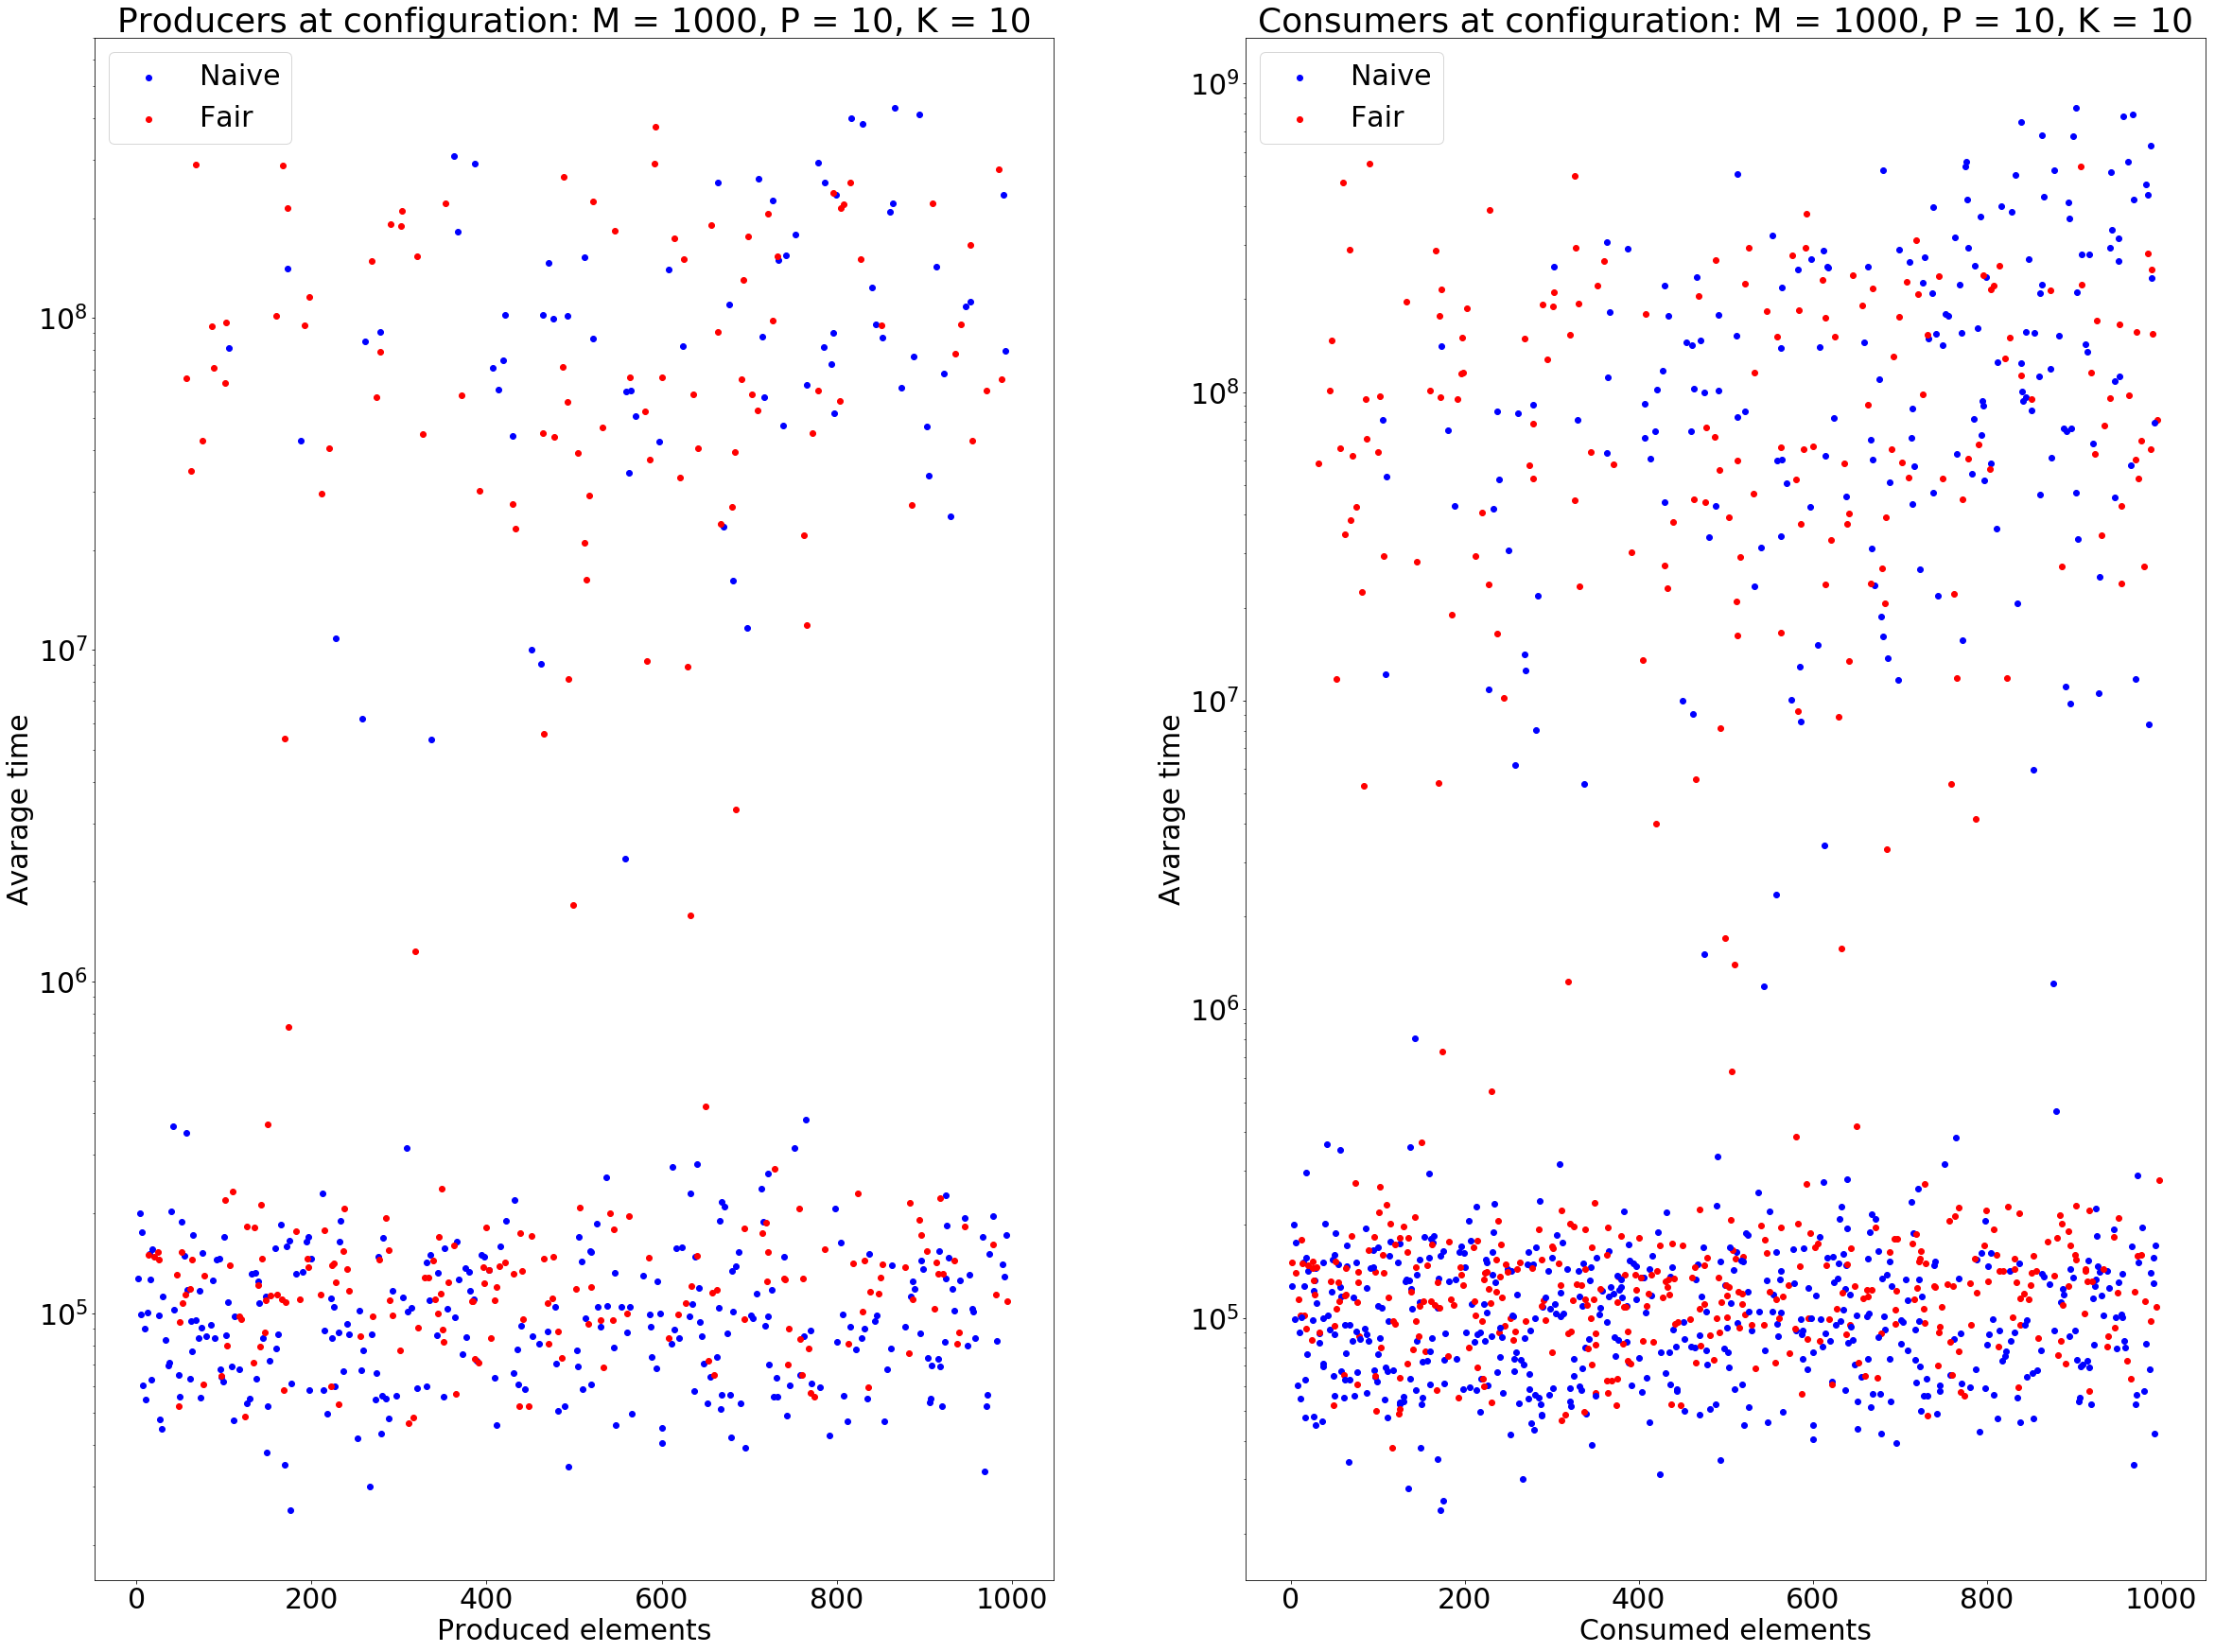

In [30]:
plot("naive/naive_times.txt", "fair/fair_times.txt", "M = 1000, P = 10, K = 10")

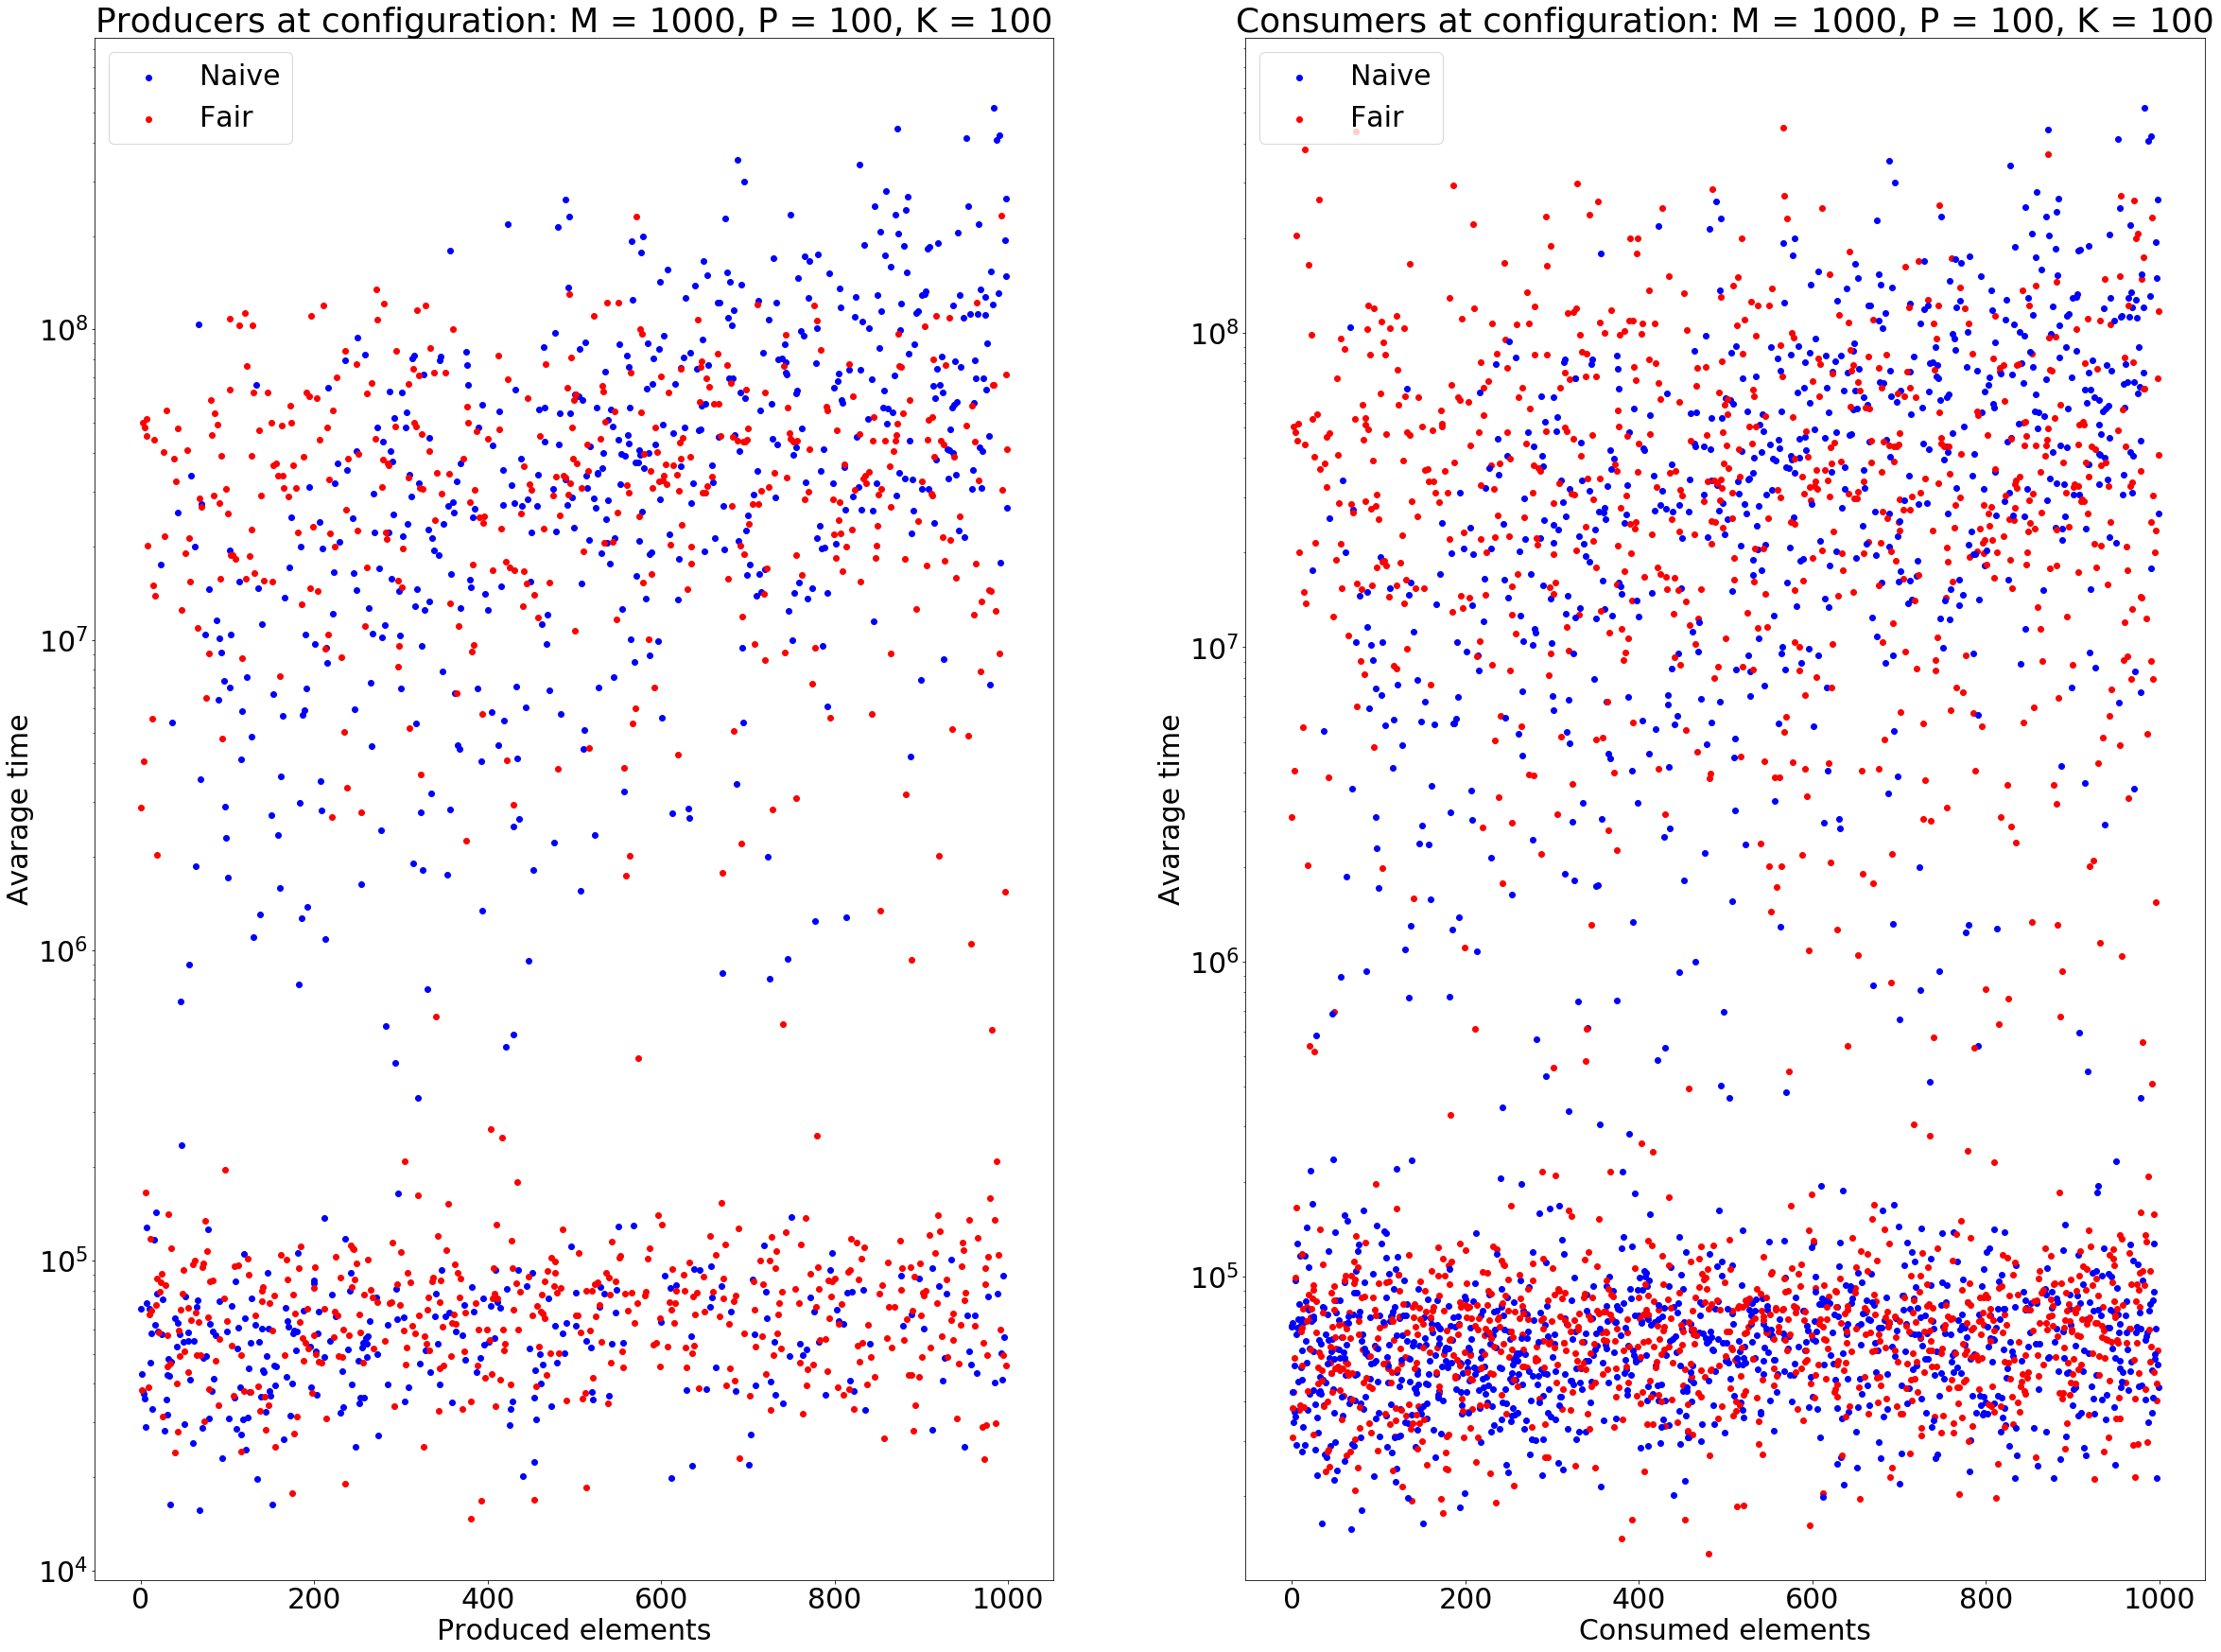

In [31]:
plot("naive/naive_times.txt", "fair/fair_times.txt", "M = 1000, P = 100, K = 100")

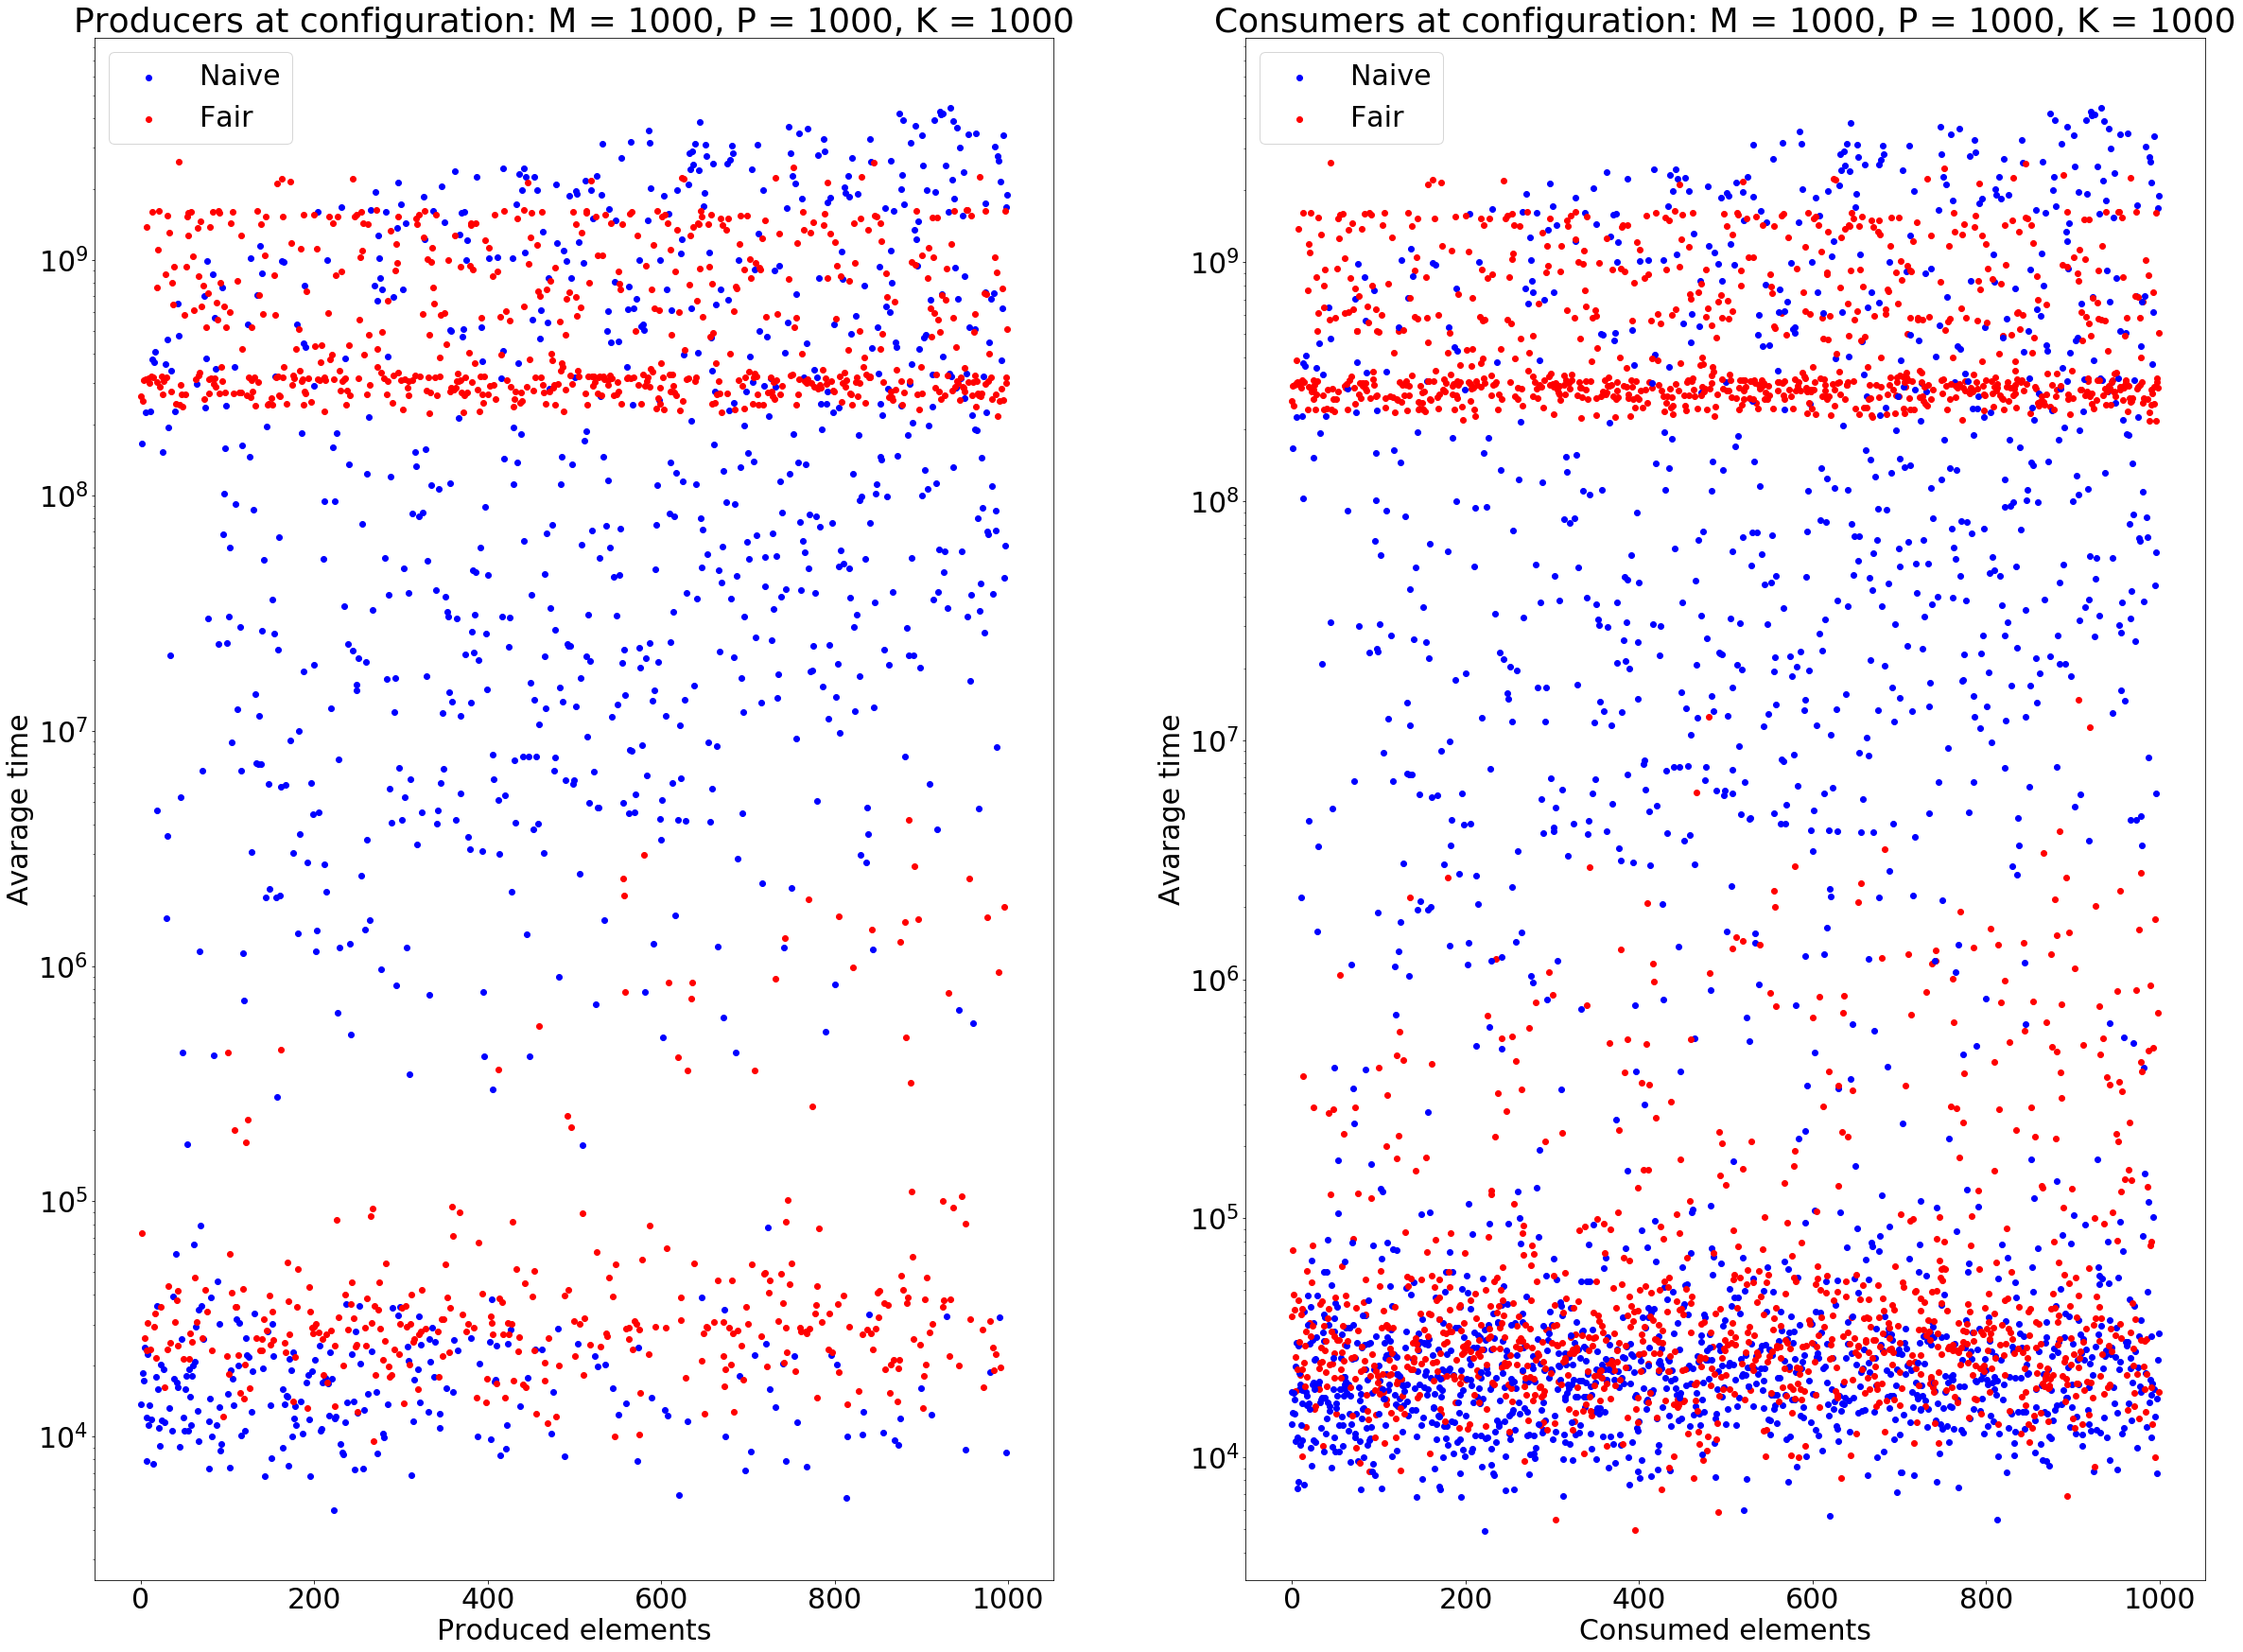

In [32]:
plot("naive/naive_times.txt", "fair/fair_times.txt", "M = 1000, P = 1000, K = 1000")

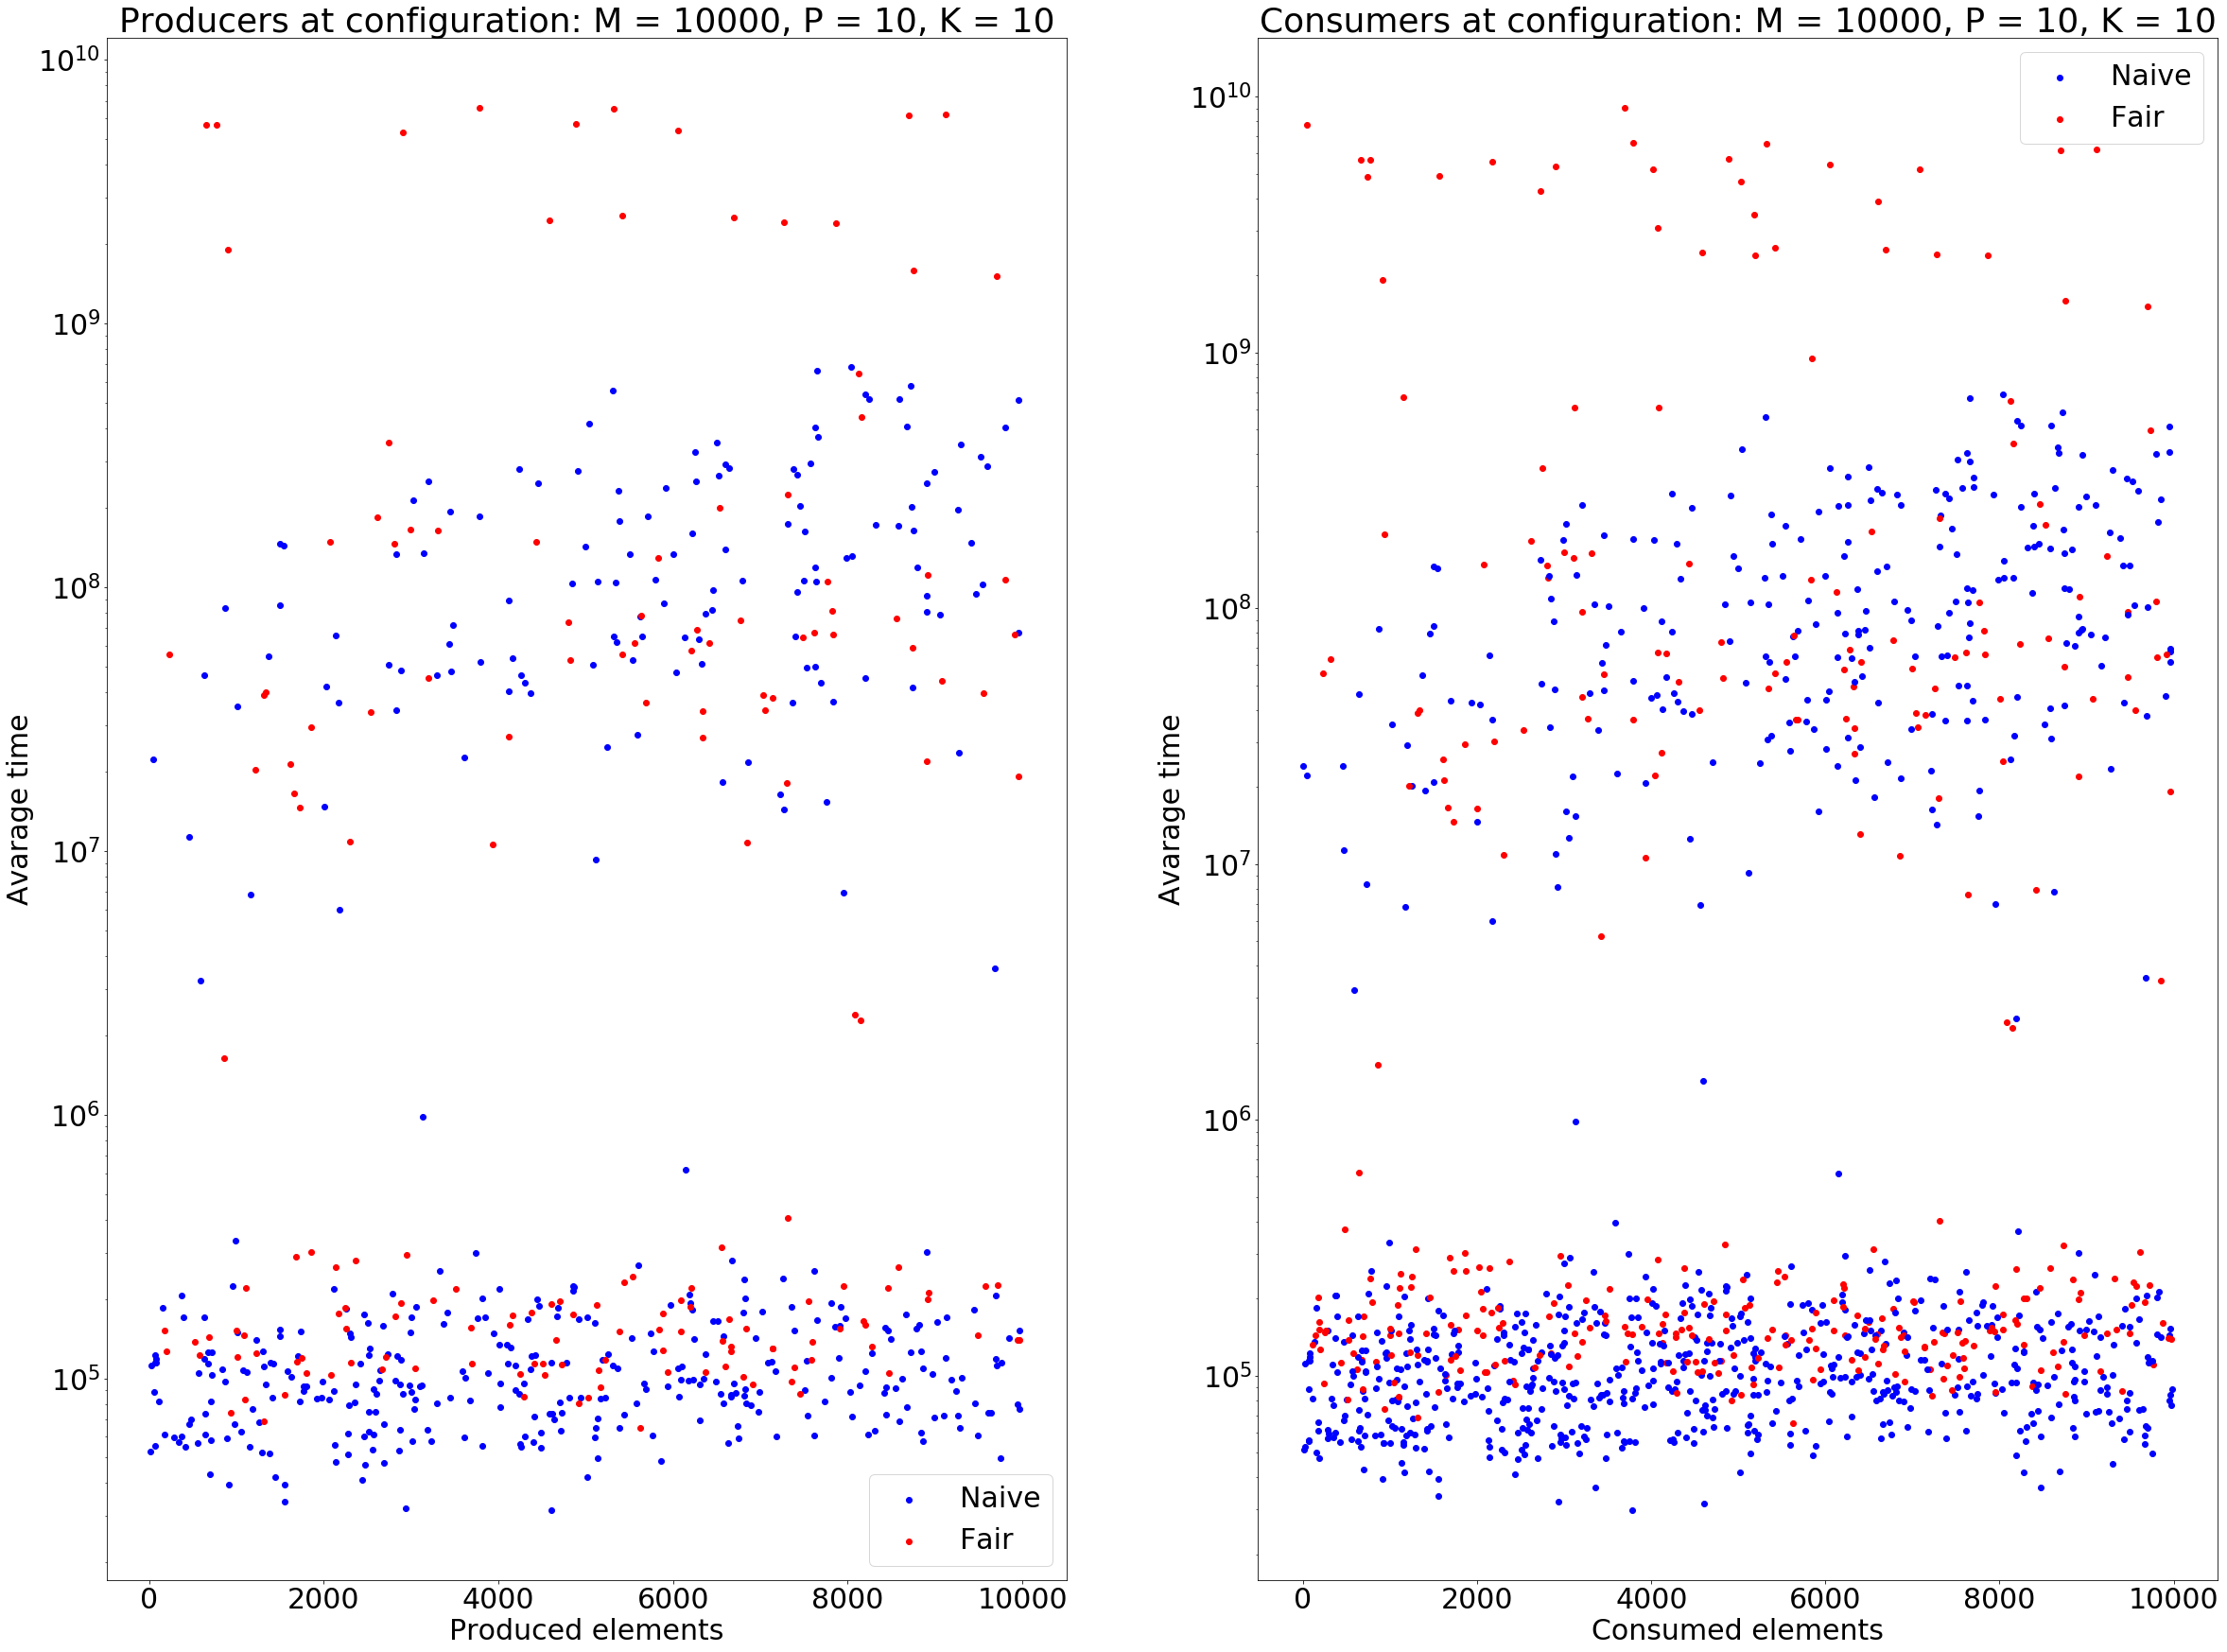

In [33]:
plot("naive/naive_times.txt", "fair/fair_times.txt", "M = 10000, P = 10, K = 10")

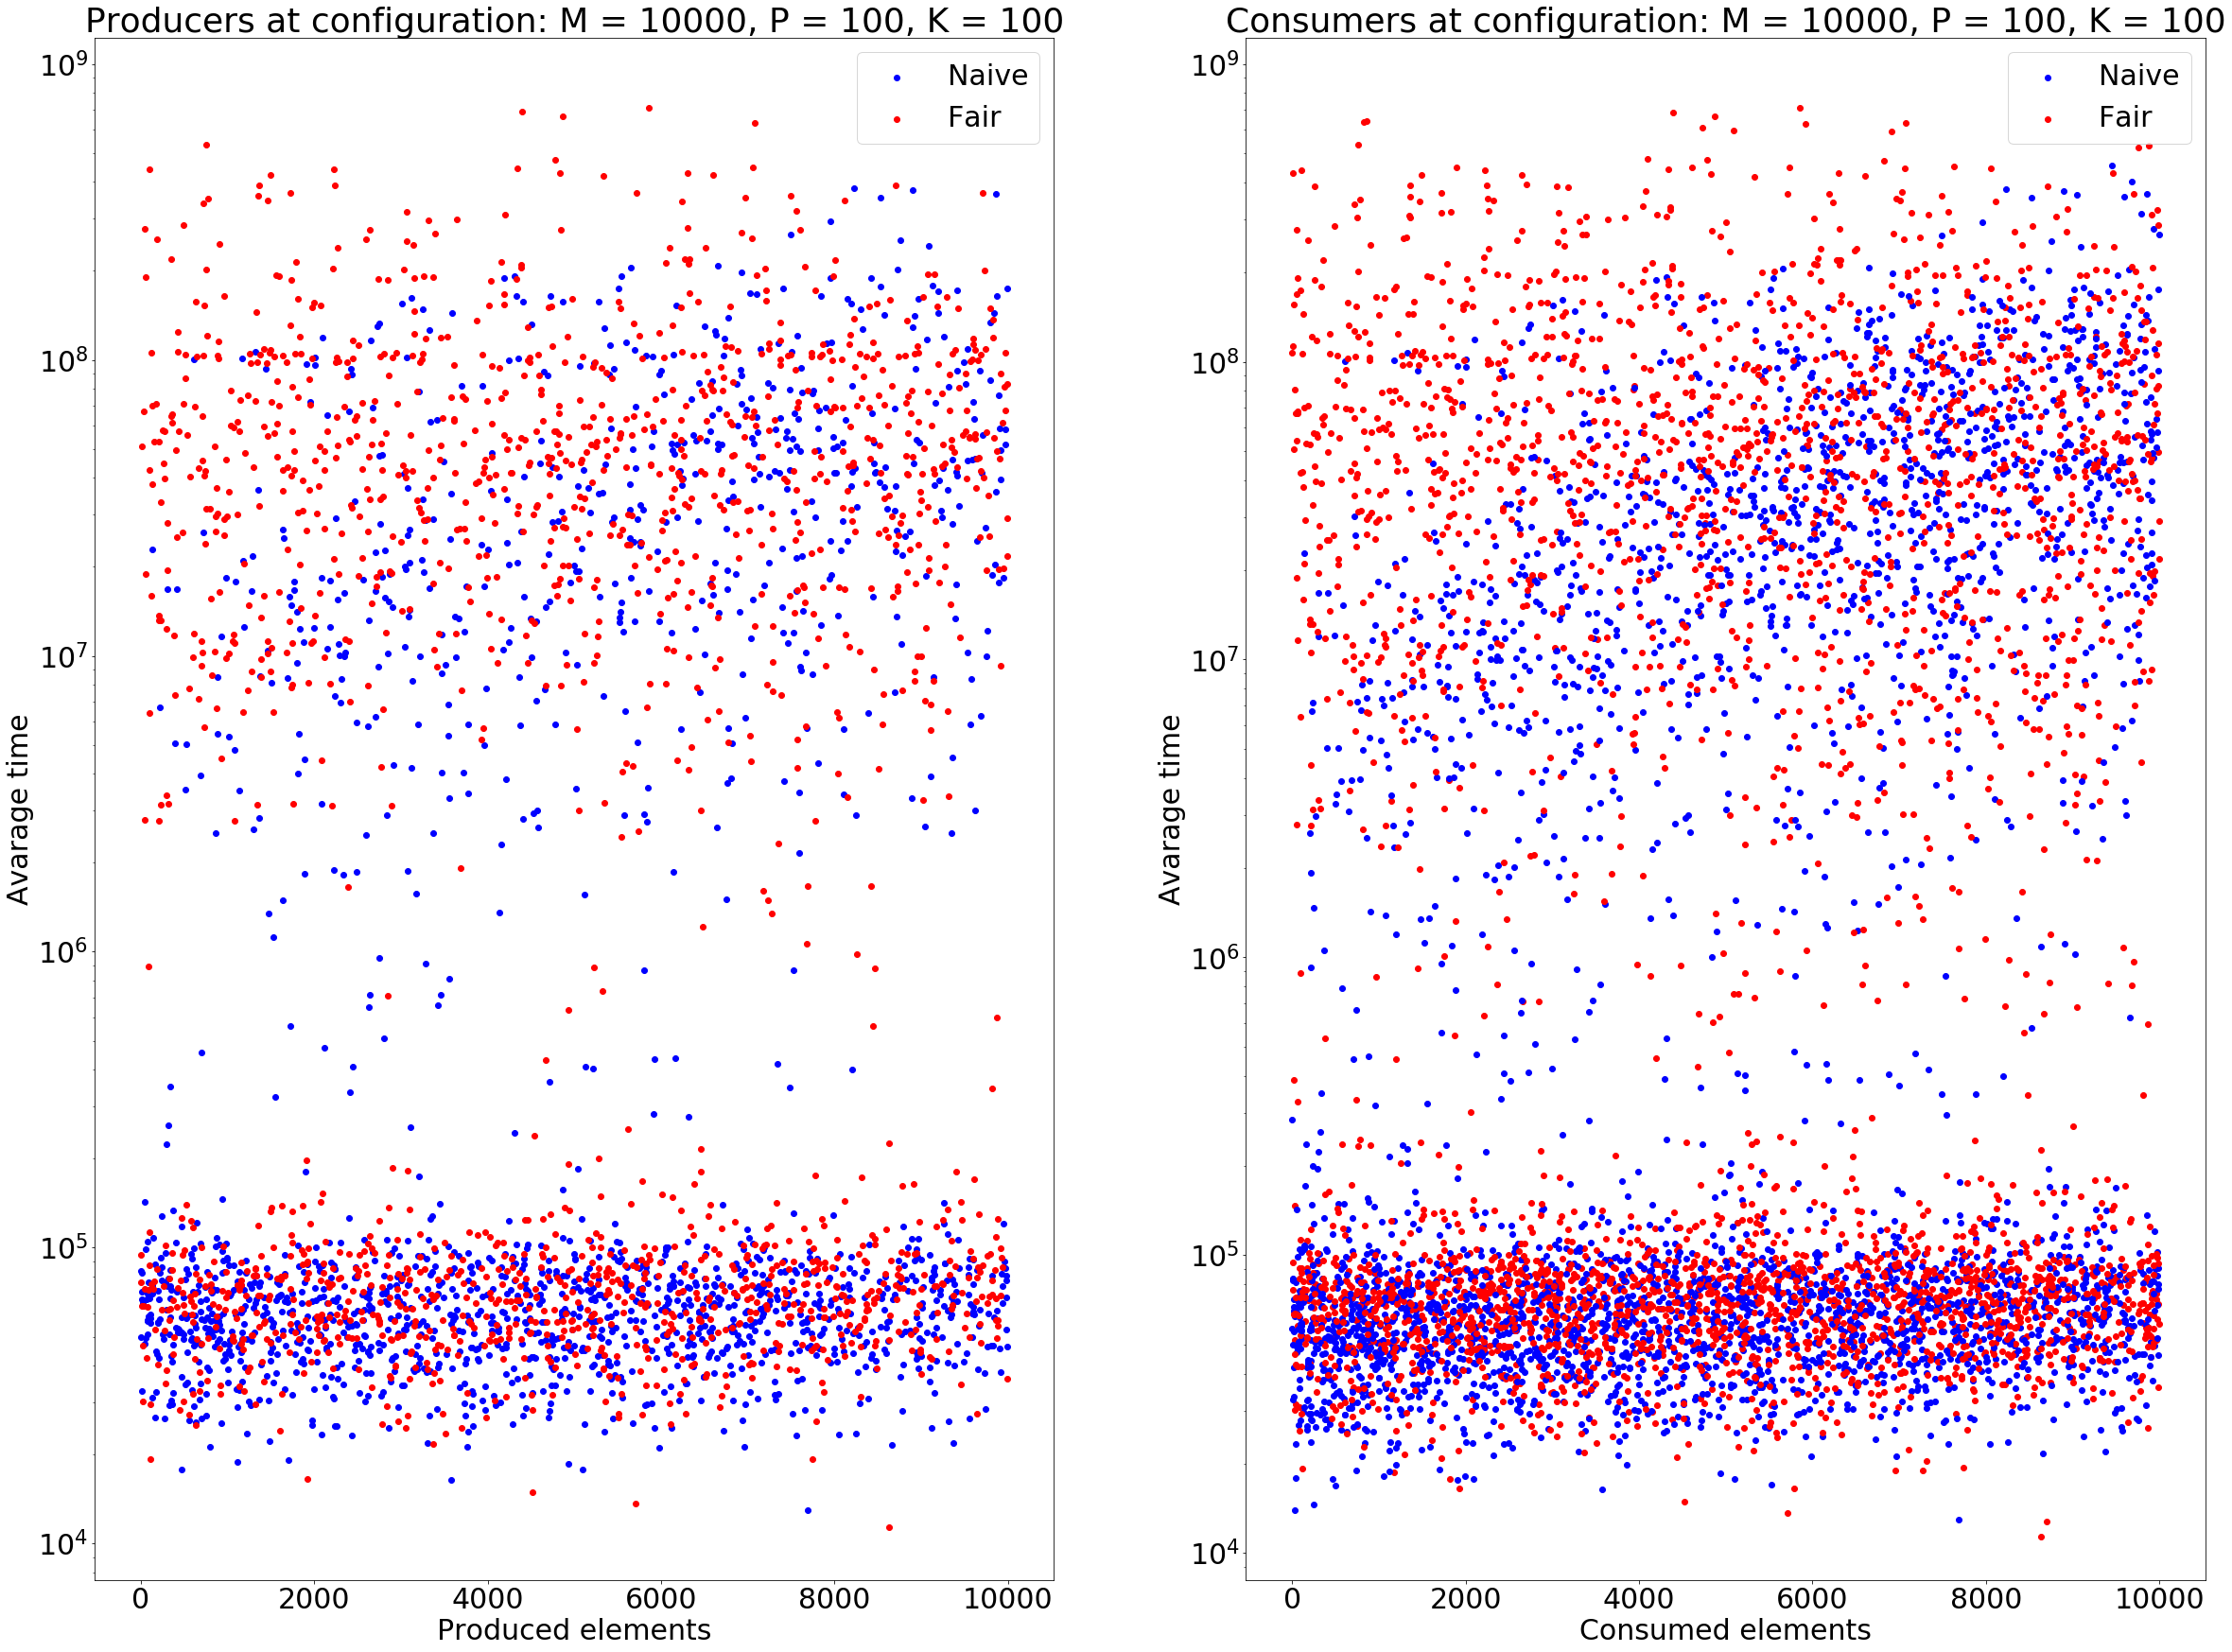

In [34]:
plot("naive/naive_times.txt", "fair/fair_times.txt", "M = 10000, P = 100, K = 100")

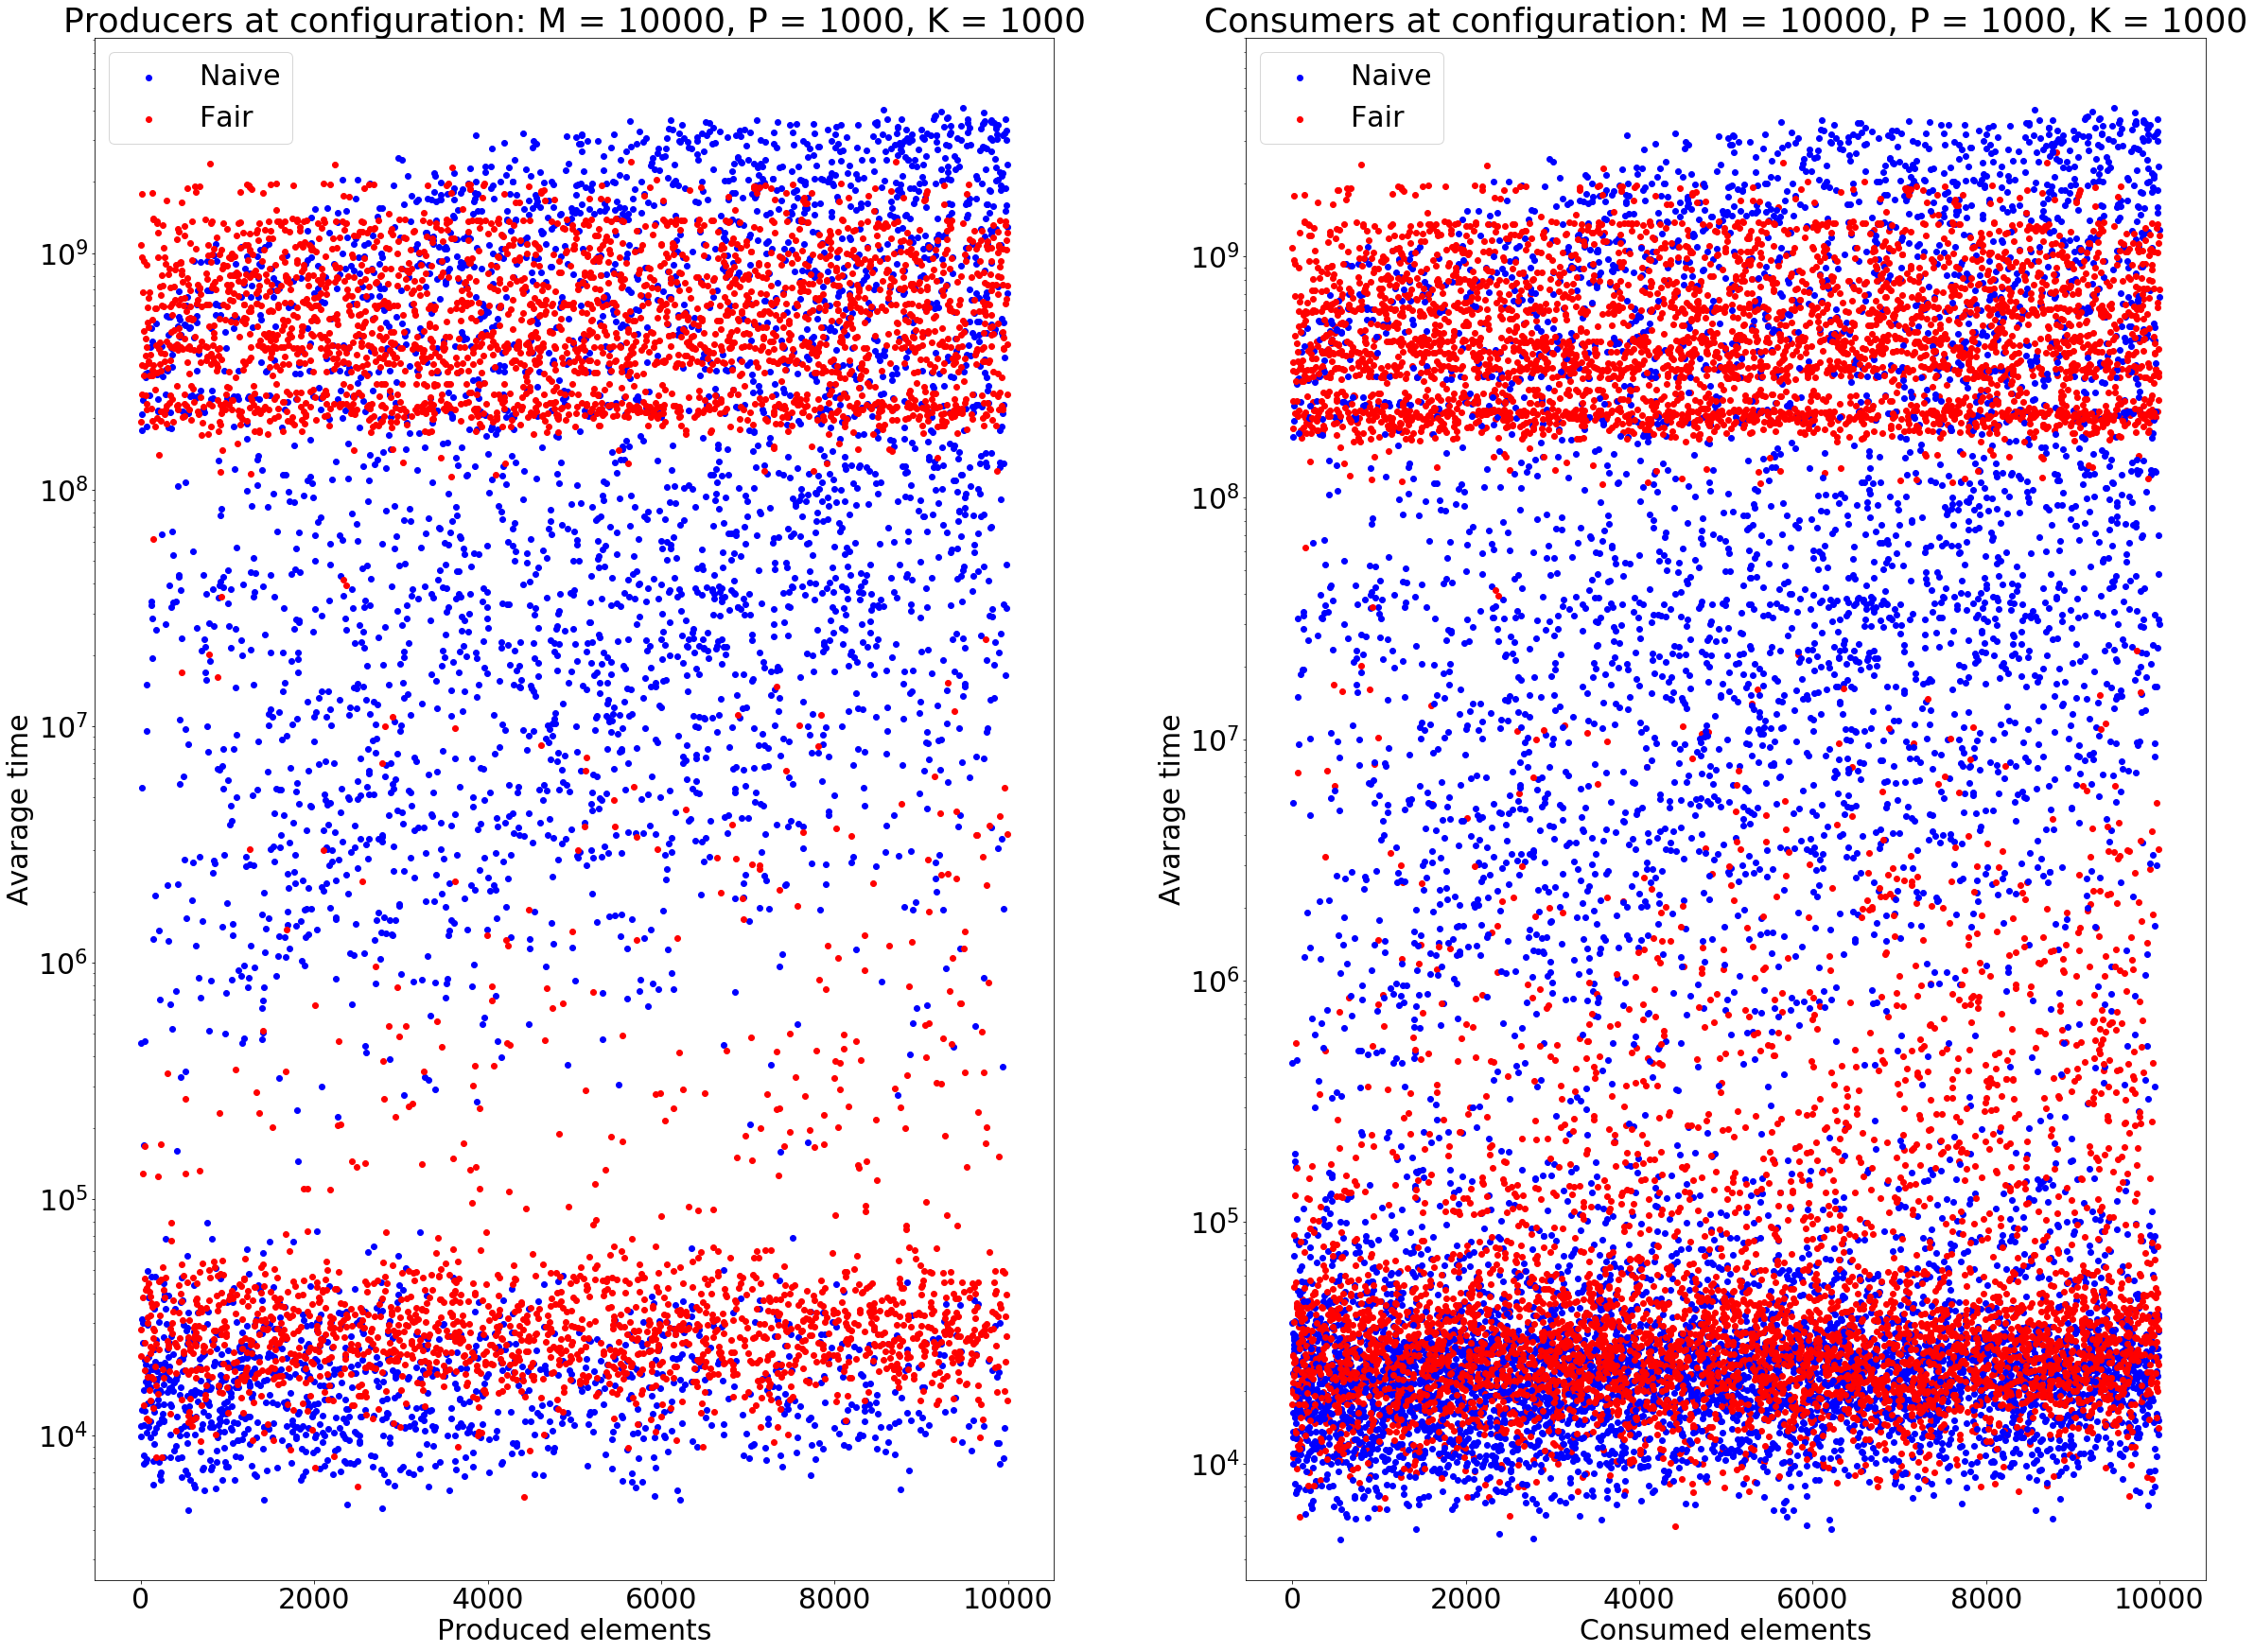

In [35]:
plot("naive/naive_times.txt", "fair/fair_times.txt", "M = 10000, P = 1000, K = 1000")

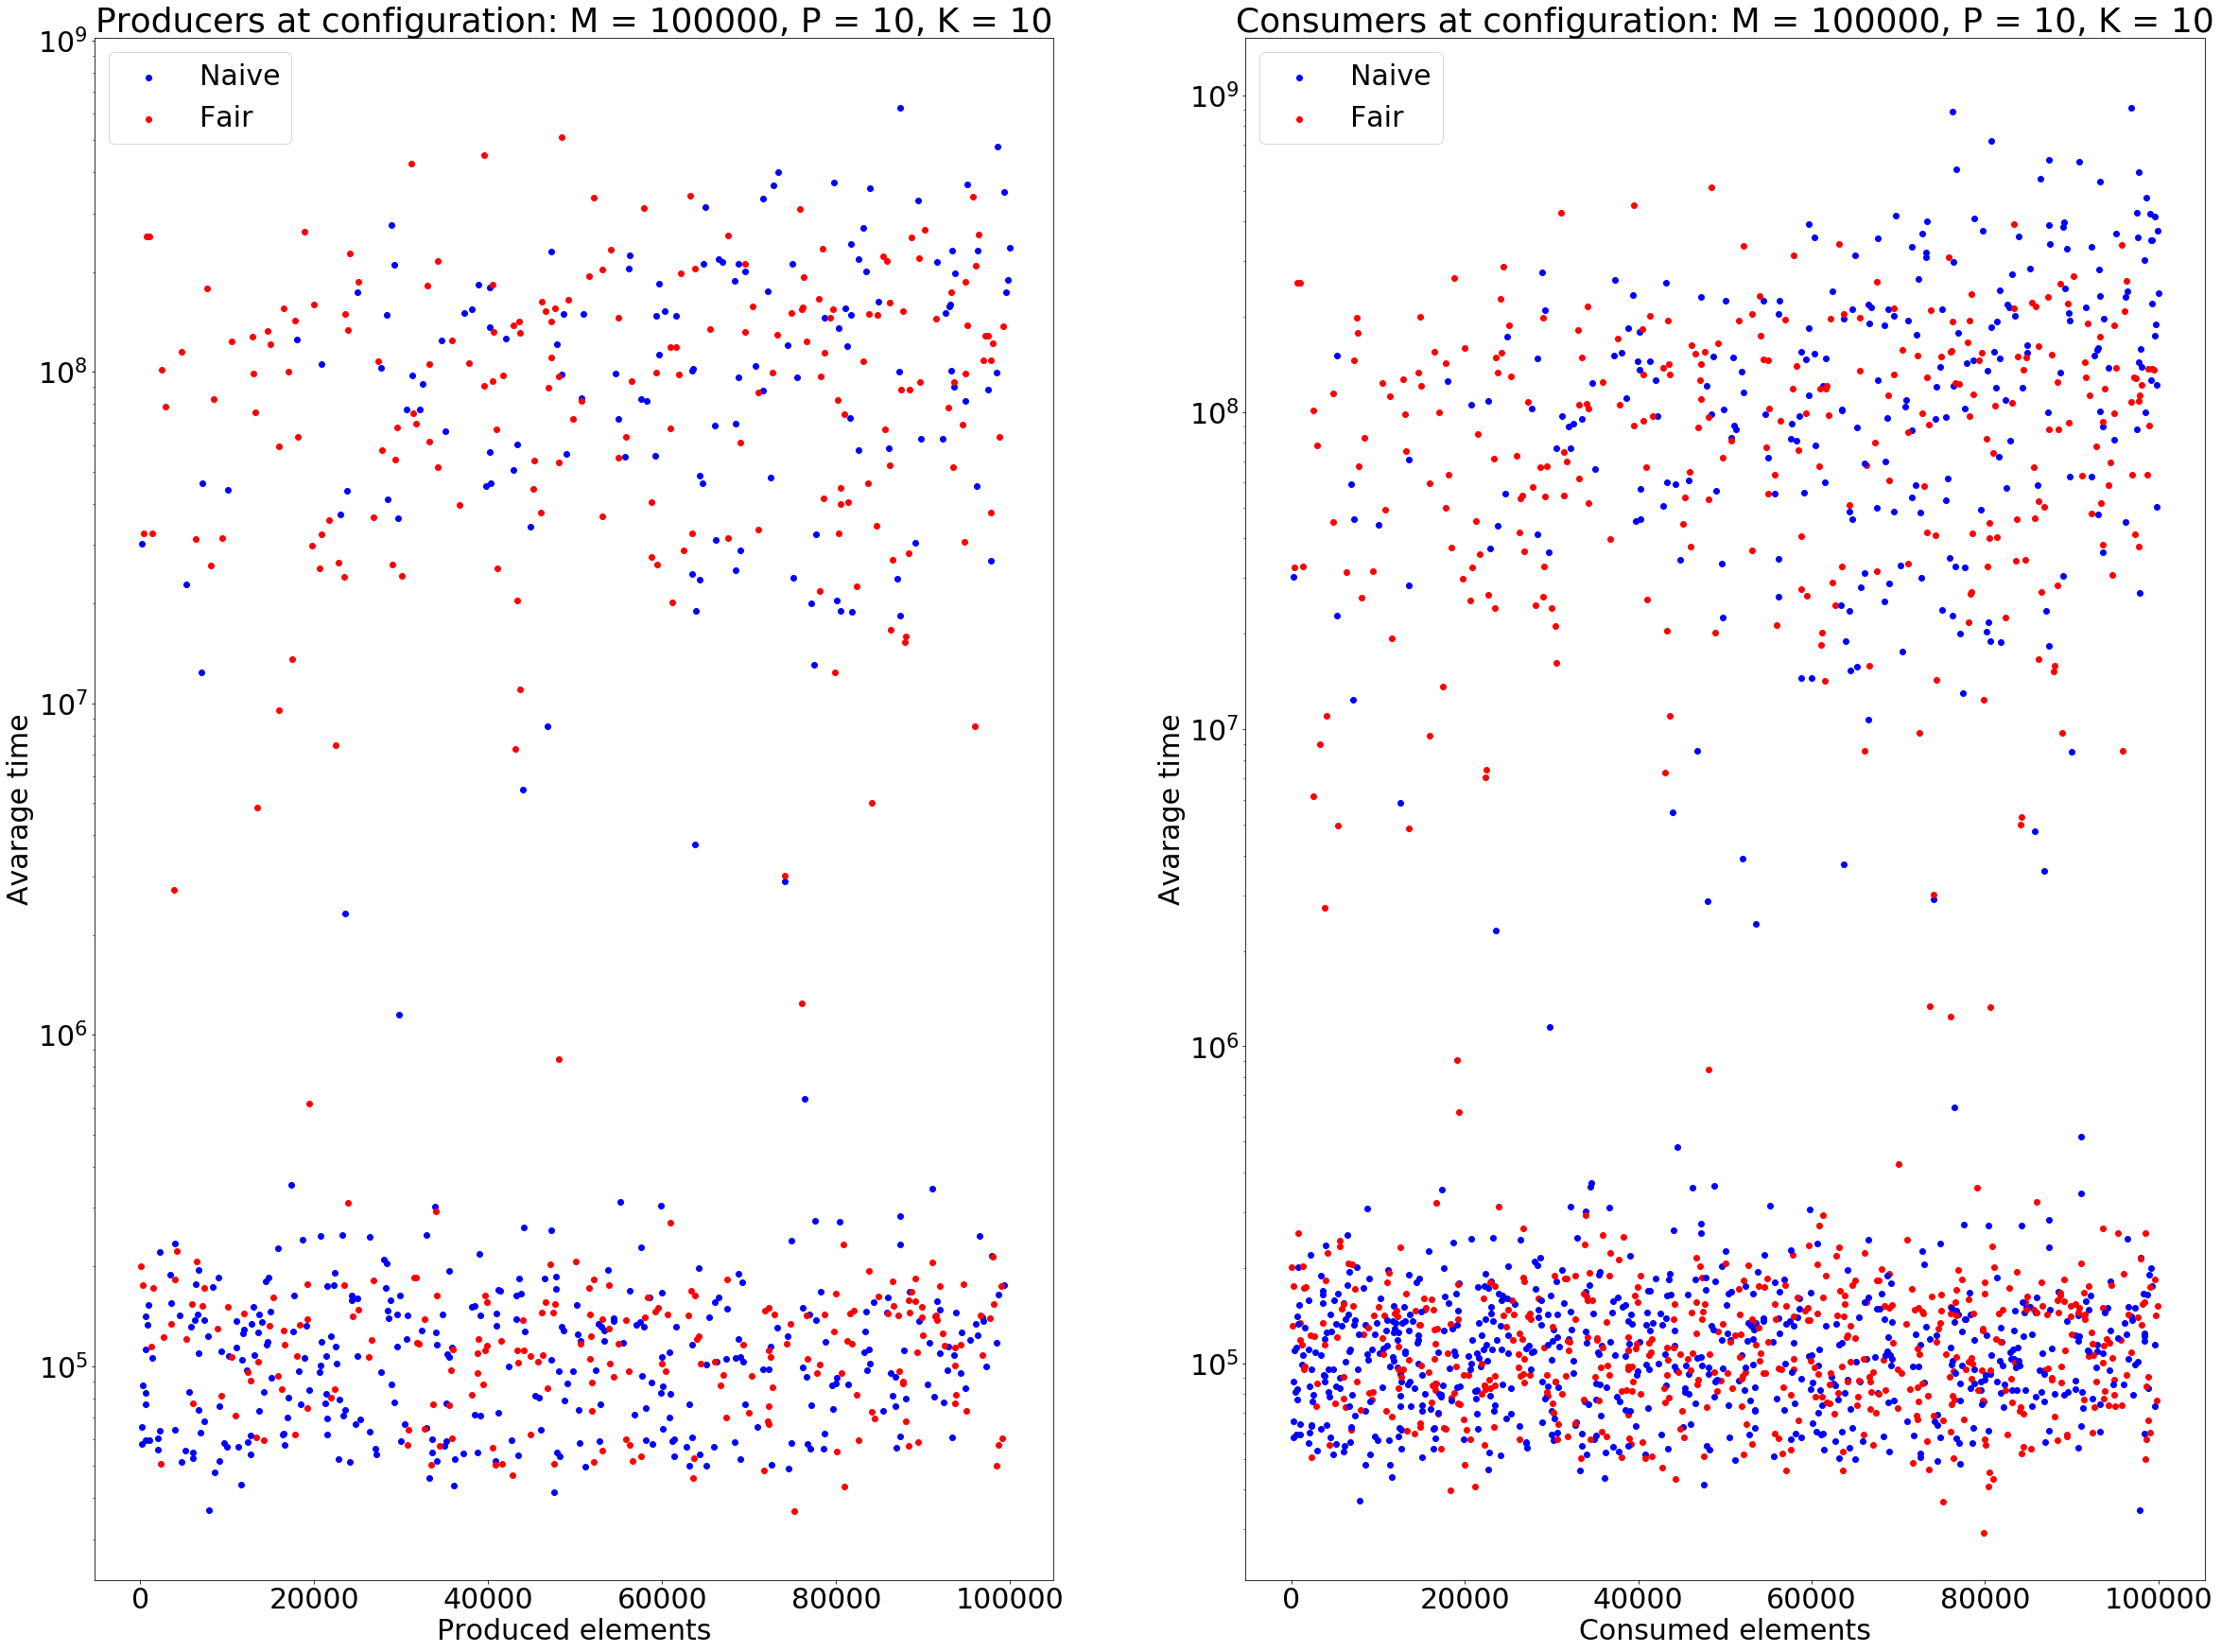

In [36]:
plot("naive/naive_times.txt", "fair/fair_times.txt", "M = 100000, P = 10, K = 10")

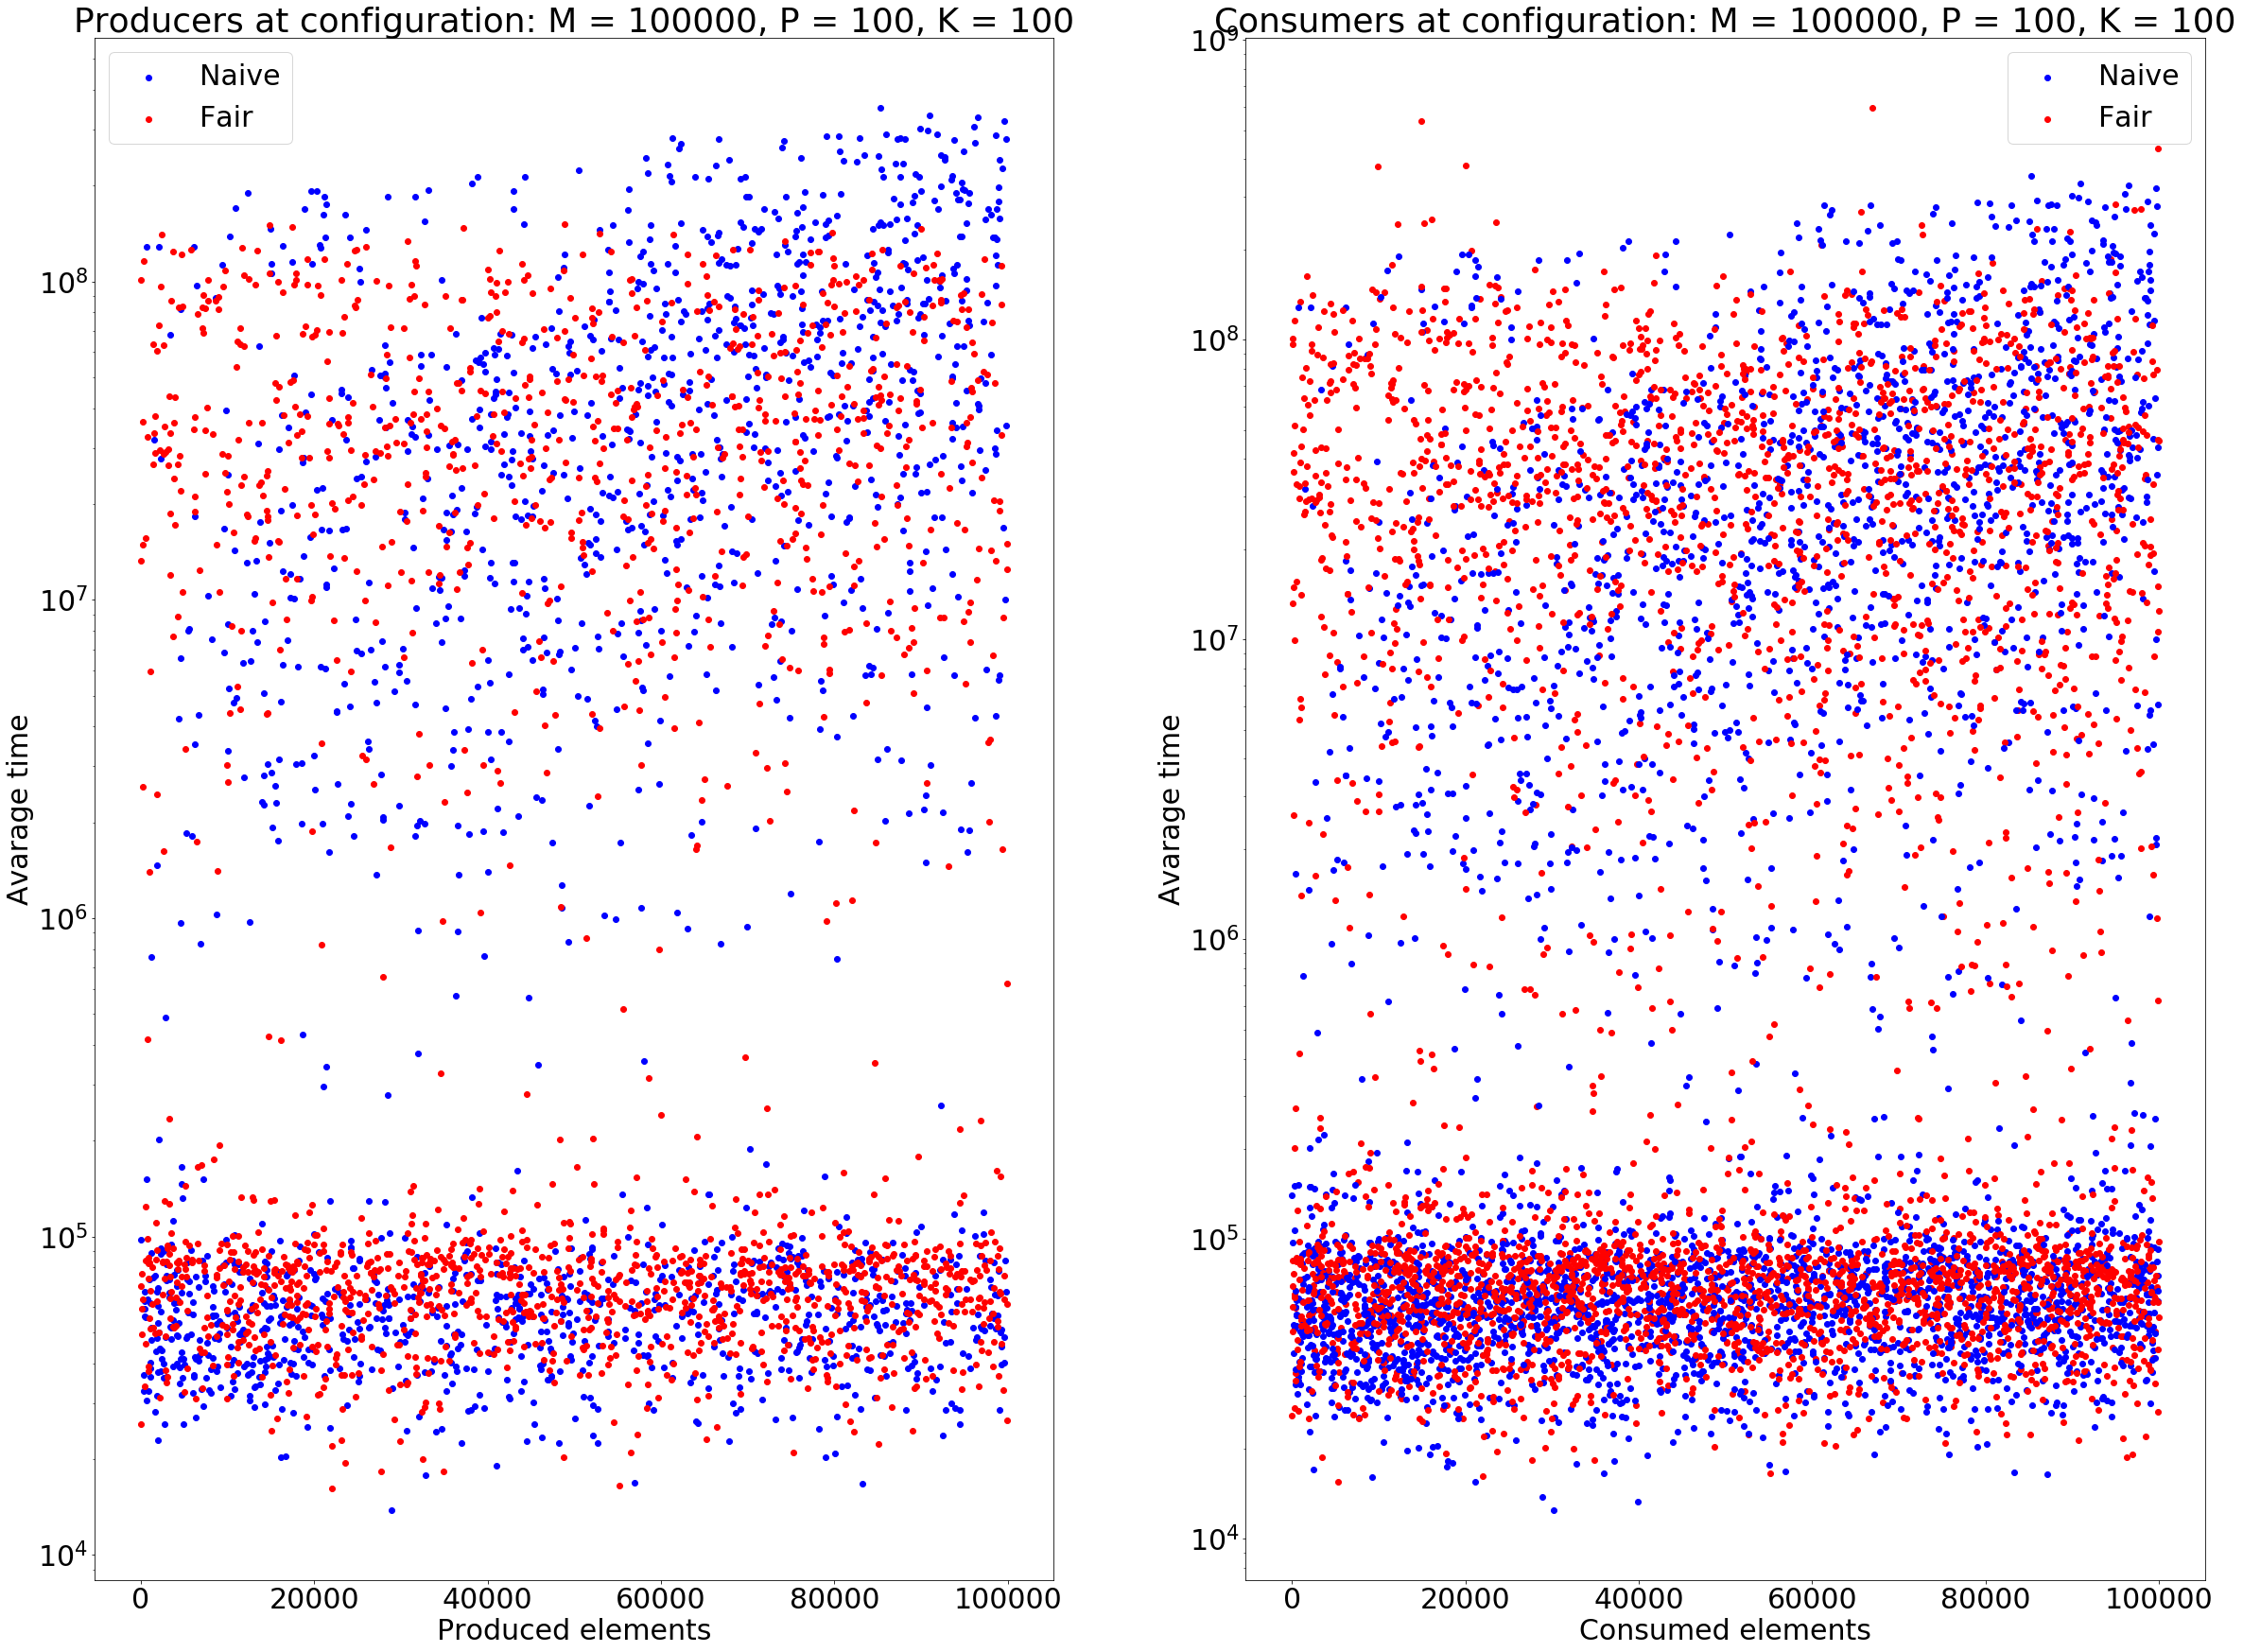

In [37]:
plot("naive/naive_times.txt", "fair/fair_times.txt", "M = 100000, P = 100, K = 100")

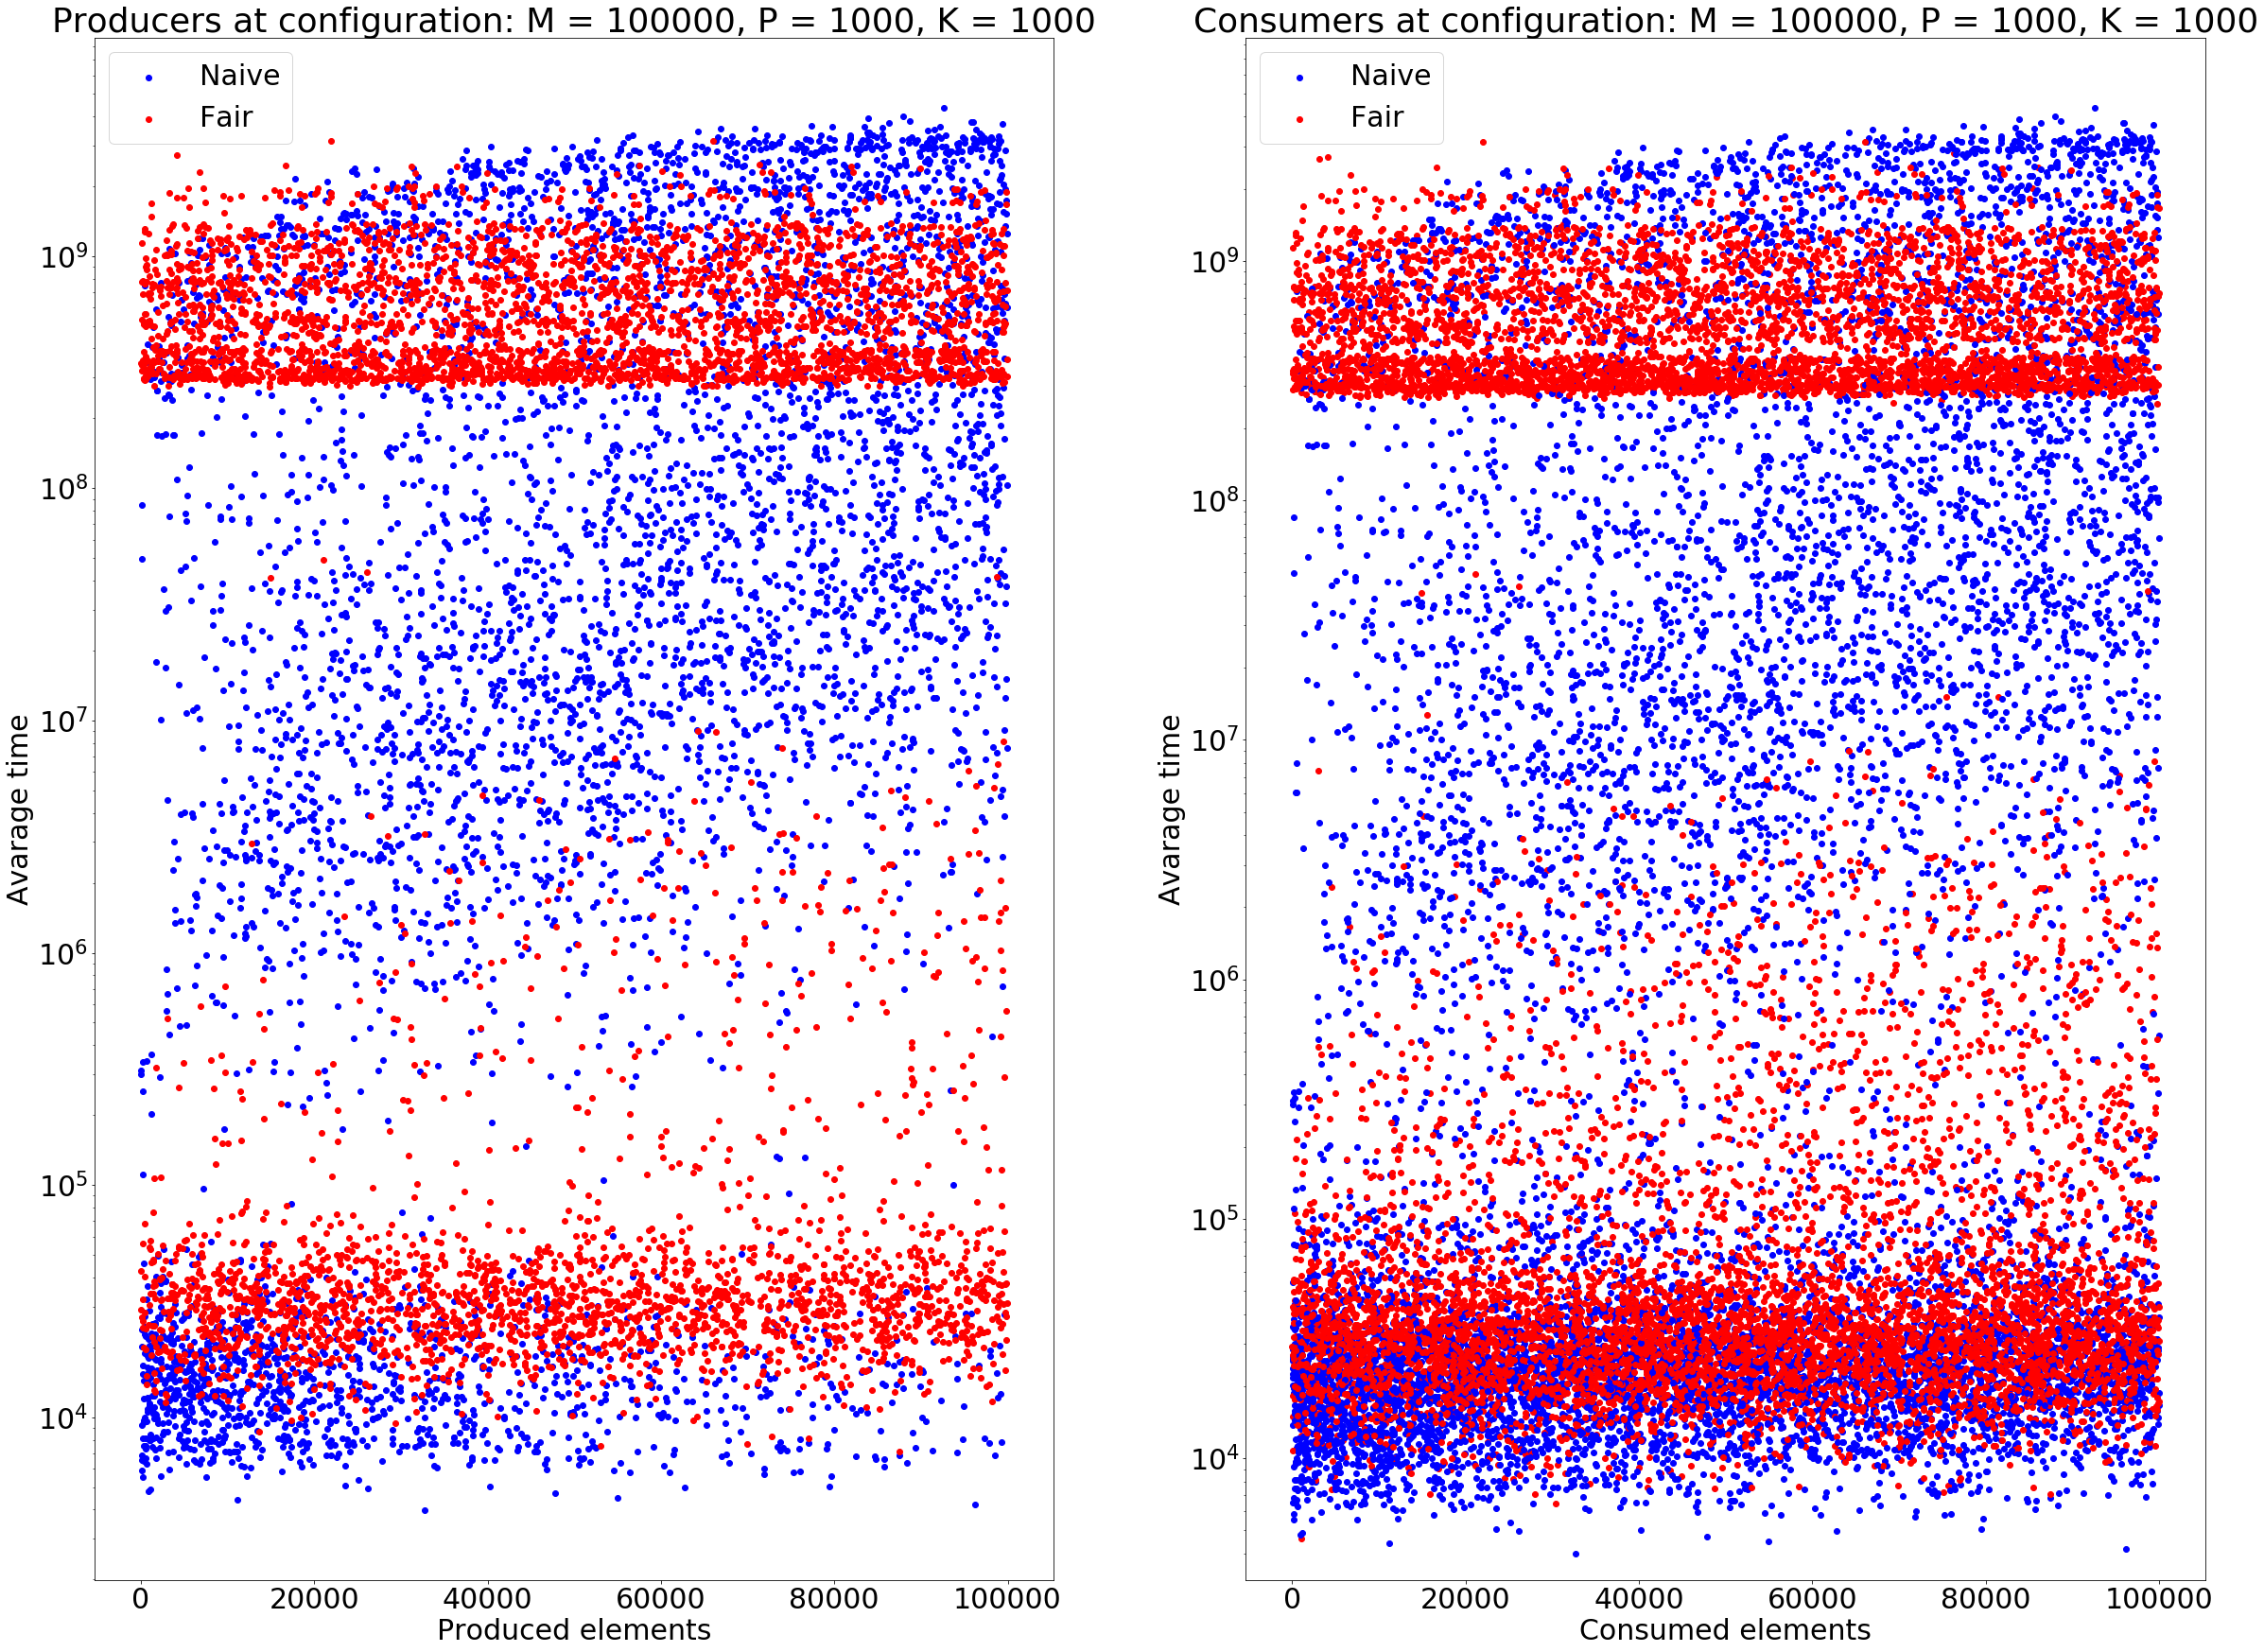

In [38]:
plot("naive/naive_times.txt", "fair/fair_times.txt", "M = 100000, P = 1000, K = 1000")